# Milestone 3 | Team 2

**Members:**

* Abraiz Azhar
mk7592@nyu.edu

* Maria Korotkina
mmk9366@nyu.edu

* Katia Yesiyeva
ky1143@nyu.edu

* Majid Ibrahim
mi1171@nyu.edu


**Selected dataset:** movielens

In [1]:
# Mounting the drive so we have read/write access
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# Add a path to the folder containing raw movielens data
# raw_data_folder = "/content/drive/MyDrive/Applied Data Science/Data Science Group Project/movielens"
raw_data_folder = "/content/drive/MyDrive/Applied Data Science/Data Science Group Project/movielens"
# Add a path to the folder where the cleaned dataset files will be stored
clean_folder = "/content/drive/MyDrive/Applied Data Science/Data Science Group Project/cleaned_data"

# Final: By Review Dataframe

In [3]:
import pandas as pd

# Define column names
movies_columns = ['MovieID', 'Title', 'Genres']
ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

# Read the CSV files with column names
df_movies = pd.read_csv(raw_data_folder+"/movies.dat", sep="::", encoding='ISO-8859-1', header=None, names=movies_columns)
df_ratings = pd.read_csv(raw_data_folder+"/ratings.dat", sep="::", encoding='ISO-8859-1', header=None, names=ratings_columns)
df_users = pd.read_csv(raw_data_folder+"/users.dat", sep="::", encoding='ISO-8859-1', header=None, names=users_columns)


# Load genre data into a pandas dataframe

# Define the occupation mapping
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}
# Map the occupation column using the occupation_mapping dictionary
df_users["Occupation"] = df_users["Occupation"].map(occupation_mapping)

# Extract the release year from the title column
df_movies['ReleaseYear'] = df_movies['Title'].str.extract(r'\((\d{4})\)$')
# Replace the pipe symbol with a comma in the genres column
df_movies['Genres'] = df_movies['Genres'].str.replace('|', ', ')
#explode data based on genre
#df_movies['Genres'] = df_movies['Genres'].str.split(',')
#df_movies = df_movies.explode('Genres')



users = pd.merge(df_ratings, df_users, on='UserID')

final = pd.merge(users, df_movies, on='MovieID')

final

<ipython-input-3-b0ef00c0b03c>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movies = pd.read_csv(raw_data_folder+"/movies.dat", sep="::", encoding='ISO-8859-1', header=None, names=movies_columns)
<ipython-input-3-b0ef00c0b03c>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ratings = pd.read_csv(raw_data_folder+"/ratings.dat", sep="::", encoding='ISO-8859-1', header=None, names=ratings_columns)
<ipython-input-3-b0ef00c0b03c>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpr

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,ReleaseYear
0,1,1193,5,978300760,F,1,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,technician/engineer,47901,Modulations (1998),Documentary,1998
1000205,5675,2703,3,976029116,M,35,sales/marketing,30030,Broken Vessels (1998),Drama,1998
1000206,5780,2845,1,958153068,M,18,technician/engineer,92886,White Boys (1999),Drama,1999
1000207,5851,3607,5,957756608,F,18,writer,55410,One Little Indian (1973),"Comedy, Drama, Western",1973


### Transforming Genres and Occupations into binary variables (dummies)

In [4]:
genres = final['Genres'].str.get_dummies(sep=', ')

# Concatenate the new genres DataFrame with the original DataFrame
final = pd.concat([final, genres], axis=1)

occupation = final['Occupation'].str.get_dummies()

# Concatenate the new genres DataFrame with the original DataFrame
final = pd.concat([final, occupation], axis=1)
final = final[final['other or not specified'] != 1]
final.drop('other or not specified', axis = 1, inplace = True)

In [5]:
import datetime
final['YearReviewed'] = pd.to_datetime(final['Timestamp'], unit='s').dt.year
final['YearReviewed'] = final['YearReviewed'].astype('Int64')
final['ReleaseYear'] = final['ReleaseYear'].astype('Int64')
final['MovieAge'] = final['YearReviewed'] - final['ReleaseYear']
final

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer,YearReviewed,MovieAge
0,1,1193,5,978300760,F,1,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,2000,25
1,2,1193,5,978298413,M,56,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,1,0,0,0,0,2000,25
2,12,1193,4,978220179,M,25,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,2000,25
3,15,1193,4,978199279,M,25,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,2000,25
4,17,1193,5,978158471,M,50,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,2000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,technician/engineer,47901,Modulations (1998),Documentary,...,0,0,0,0,1,0,0,0,2000,2
1000205,5675,2703,3,976029116,M,35,sales/marketing,30030,Broken Vessels (1998),Drama,...,0,1,0,0,0,0,0,0,2000,2
1000206,5780,2845,1,958153068,M,18,technician/engineer,92886,White Boys (1999),Drama,...,0,0,0,0,1,0,0,0,2000,1
1000207,5851,3607,5,957756608,F,18,writer,55410,One Little Indian (1973),"Comedy, Drama, Western",...,0,0,0,0,0,0,0,1,2000,27


In [ ]:
def extract_movie_name(movie):
    return movie.split('(')[0].strip()

# Apply the function to the 'movie name' column
final['Title'] = final['Title'].apply(extract_movie_name)
final

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer,YearReviewed,MovieAge
0,1,1193,5,978300760,F,1,K-12 student,48067,One Flew Over the Cuckoo's Nest,Drama,...,0,0,0,0,0,0,0,0,2000,25
1,2,1193,5,978298413,M,56,self-employed,70072,One Flew Over the Cuckoo's Nest,Drama,...,0,0,0,1,0,0,0,0,2000,25
2,12,1193,4,978220179,M,25,programmer,32793,One Flew Over the Cuckoo's Nest,Drama,...,0,0,0,0,0,0,0,0,2000,25
3,15,1193,4,978199279,M,25,executive/managerial,22903,One Flew Over the Cuckoo's Nest,Drama,...,0,0,0,0,0,0,0,0,2000,25
4,17,1193,5,978158471,M,50,academic/educator,95350,One Flew Over the Cuckoo's Nest,Drama,...,0,0,0,0,0,0,0,0,2000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,technician/engineer,47901,Modulations,Documentary,...,0,0,0,0,1,0,0,0,2000,2
1000205,5675,2703,3,976029116,M,35,sales/marketing,30030,Broken Vessels,Drama,...,0,1,0,0,0,0,0,0,2000,2
1000206,5780,2845,1,958153068,M,18,technician/engineer,92886,White Boys,Drama,...,0,0,0,0,1,0,0,0,2000,1
1000207,5851,3607,5,957756608,F,18,writer,55410,One Little Indian,"Comedy, Drama, Western",...,0,0,0,0,0,0,0,1,2000,27


### Transforming Age into a binary variable (dummy)

In [ ]:
final['Gender'] = final['Gender'].map({'F': 1, 'M': 0})
age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Map the age values to the specified ranges
final['Age'] = final['Age'].map(age_ranges)

age = final['Age'].str.get_dummies()

# Concatenate the new genres DataFrame with the original DataFrame
final = pd.concat([final, age], axis=1)


## Correlation Matrix (By Review)

<ipython-input-9-d60e3974c0f4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(final.corr(), dtype=np.bool))
<ipython-input-9-d60e3974c0f4>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(final.corr(), dtype=np.bool))
<ipython-input-9-d60e3974c0f4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only 

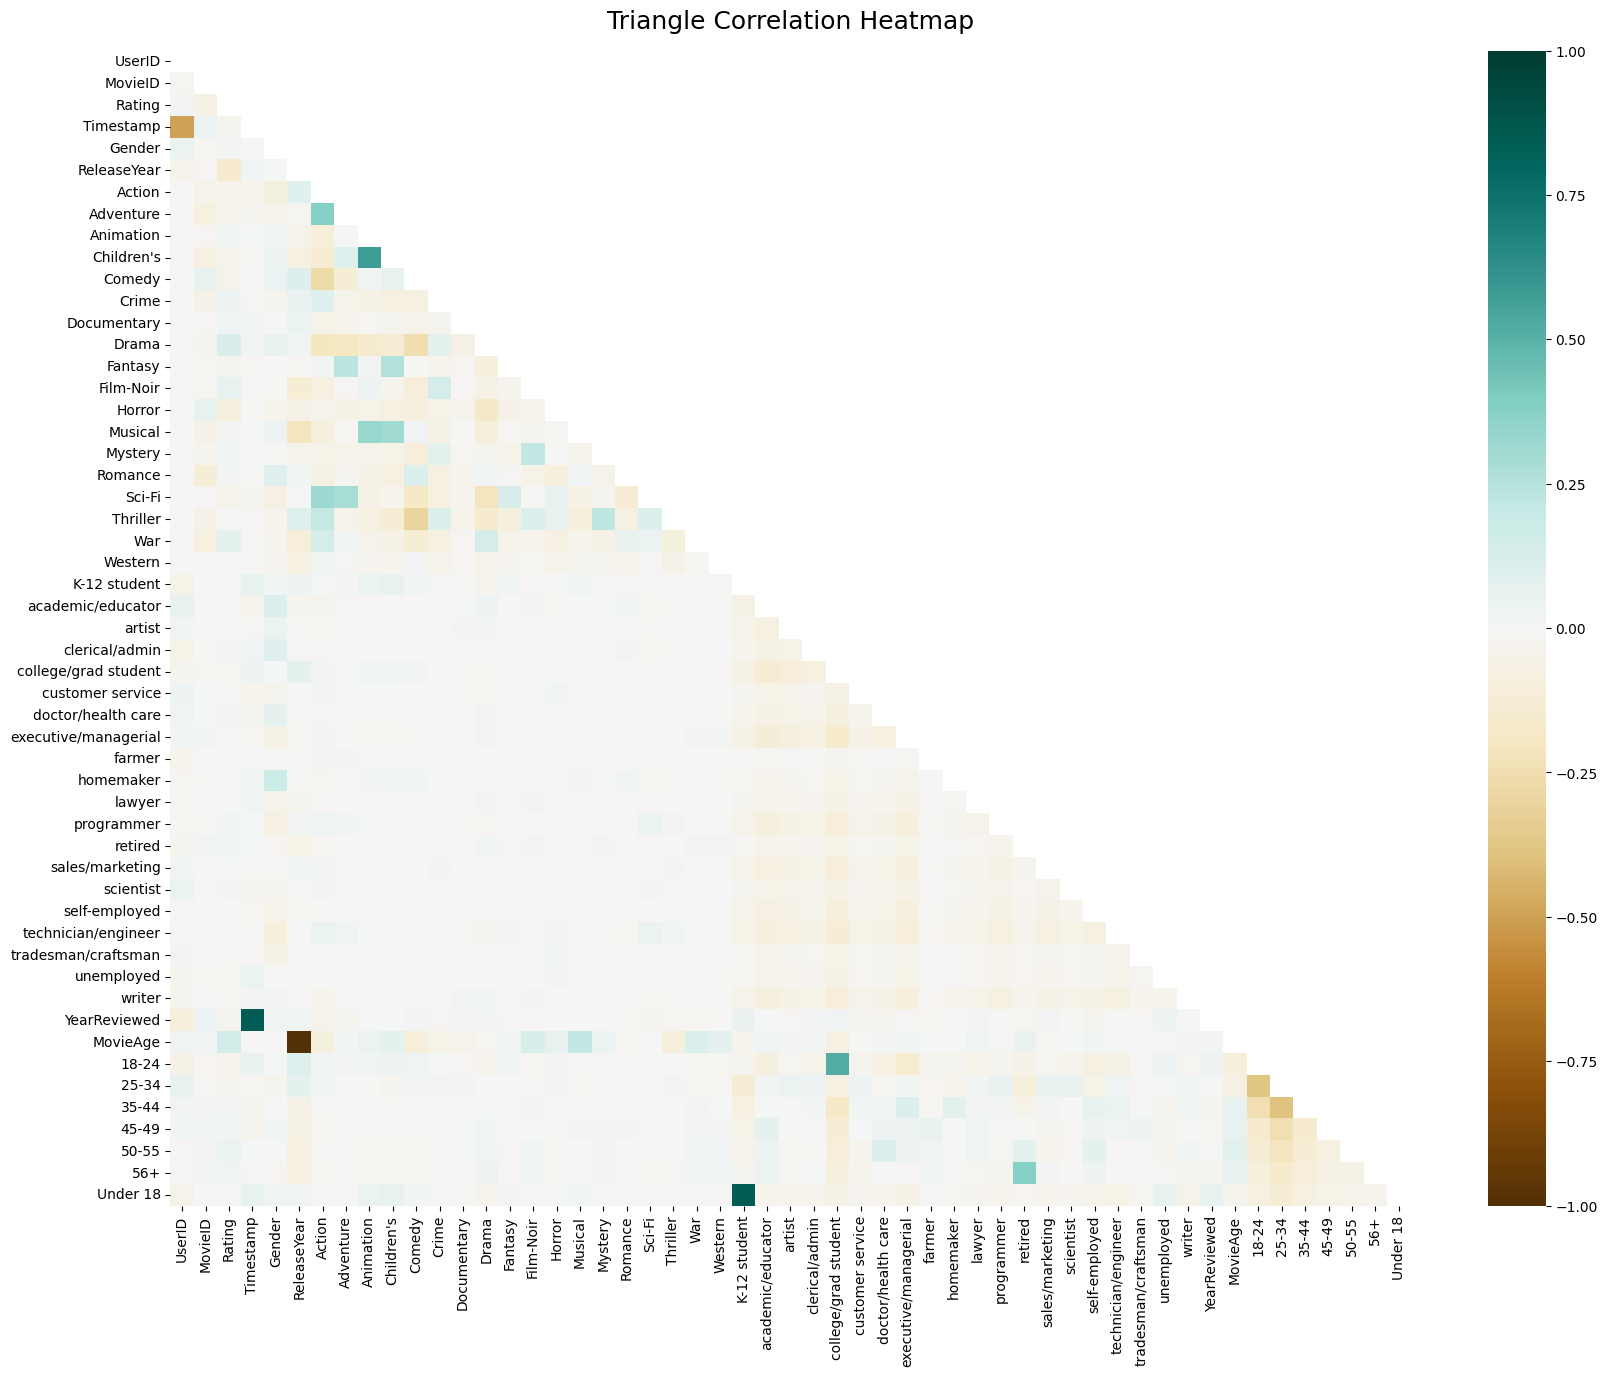

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(final.corr(), dtype=np.bool))
heatmap = sns.heatmap(final.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG');
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Features Correlating with Rating

<ipython-input-10-408080b5a84e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(final.corr()[['Rating']].sort_values(by='Rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');


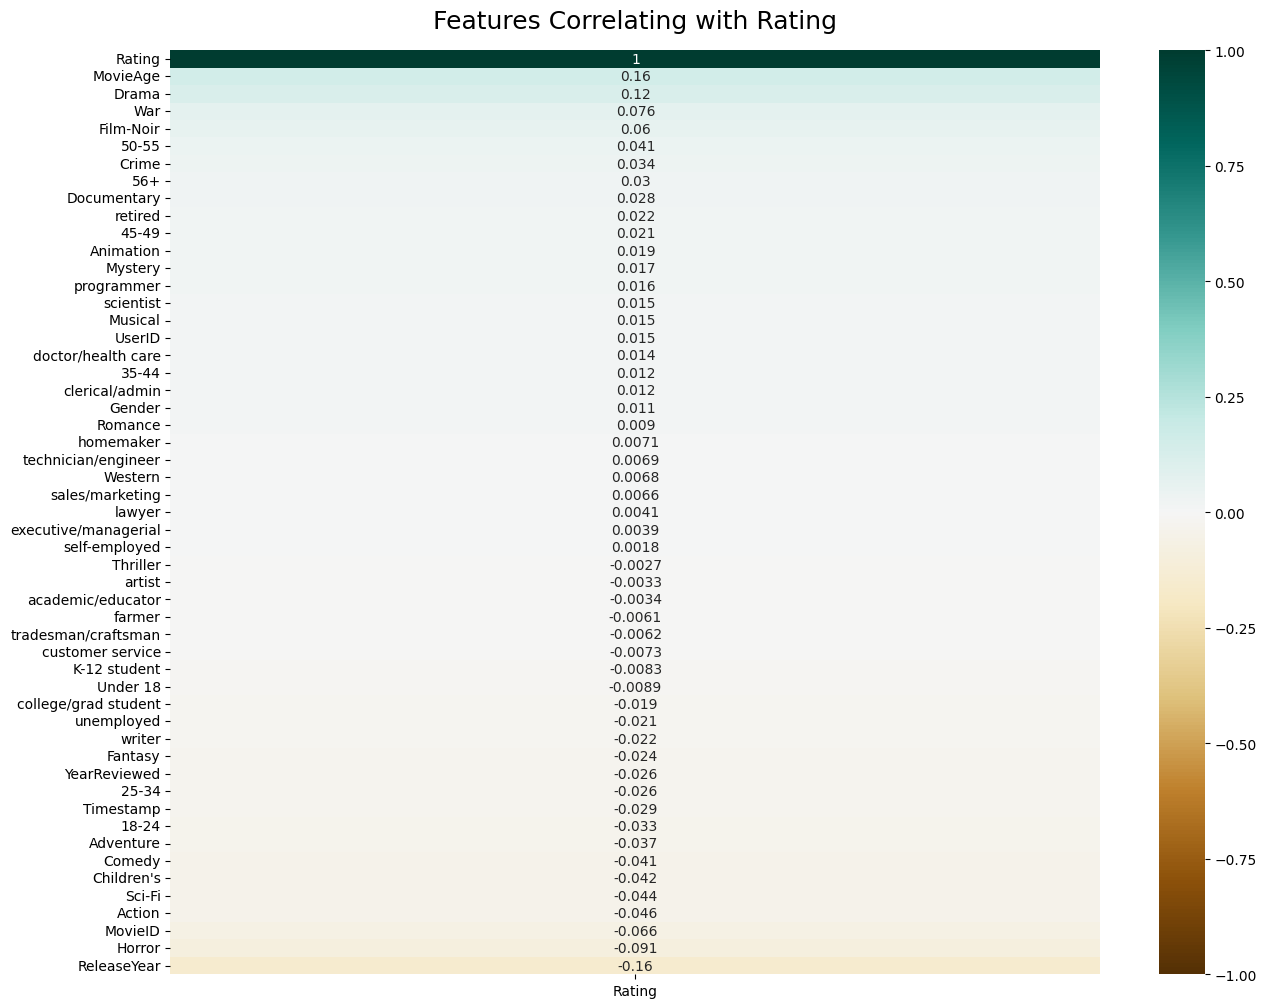

In [ ]:

plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(final.corr()[['Rating']].sort_values(by='Rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Features Correlating with Rating', fontdict={'fontsize':18}, pad=16);

In [ ]:
!pip install pyzipcode
from pyzipcode import ZipCodeDatabase

zcdb = ZipCodeDatabase()
def get_state(zip_code):
    try:
        return zcdb[zip_code].state
    except:
        return None
final['State'] = final['Zip-code'].apply(get_state)
#remove rows with none state
final = final[final['State'].notna()]

# Now 'final' contains a new column 'State' with the corresponding U.S. states
final

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyzipcode: filename=pyzipcode-3.0.1-py3-none-any.whl size=1932161 sha256=d0508bc0c90d3a67e0bee5cc8ab4beaf61a7e97d6186424d6bfe01a2b43699ff
  Stored in directory: /root/.cache/pip/wheels/33/11/bb/75313afc9ef5609e3997d374a6f6c4d48932fdb8ed8fe2ea77
Successfully built pyzipcode


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,YearReviewed,MovieAge,18-24,25-34,35-44,45-49,50-55,56+,Under 18,State
0,1,1193,5,978300760,1,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,0,0,0,0,0,1,MI
1,2,1193,5,978298413,0,56+,self-employed,70072,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,0,0,0,0,1,0,LA
2,12,1193,4,978220179,0,25-34,programmer,32793,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,1,0,0,0,0,0,FL
3,15,1193,4,978199279,0,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,1,0,0,0,0,0,VA
4,17,1193,5,978158471,0,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,0,0,0,1,0,0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,0,18-24,technician/engineer,47901,Modulations,Documentary,...,2000,2,1,0,0,0,0,0,0,IN
1000205,5675,2703,3,976029116,0,35-44,sales/marketing,30030,Broken Vessels,Drama,...,2000,2,0,0,1,0,0,0,0,GA
1000206,5780,2845,1,958153068,0,18-24,technician/engineer,92886,White Boys,Drama,...,2000,1,1,0,0,0,0,0,0,CA
1000207,5851,3607,5,957756608,1,18-24,writer,55410,One Little Indian,"Comedy, Drama, Western",...,2000,27,1,0,0,0,0,0,0,MN


## From Feedback: Raters' Occupation Distribution Across Individual Genres

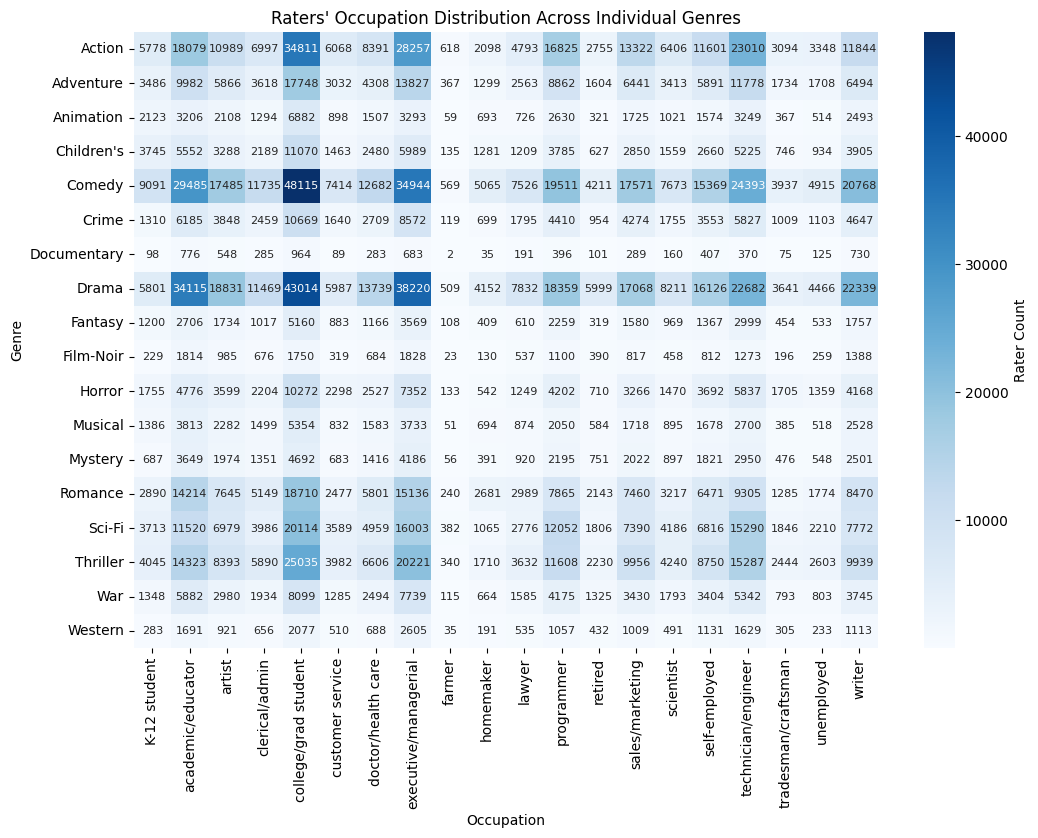

In [ ]:
final['Genres'] = final['Genres'].str.split(', ')

# Explode the 'Genres' column to create rows for each individual genre
final_exploded = final.explode('Genres')

# Data aggregation
occupation_genre_counts = final_exploded.groupby(['Genres', 'Occupation']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(occupation_genre_counts, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Rater Count'}, annot_kws={"size": 8})
plt.title("Raters' Occupation Distribution Across Individual Genres")
plt.xlabel('Occupation')
plt.ylabel('Genre')
plt.show()

## From Feedback: Distribution of Genres Across States

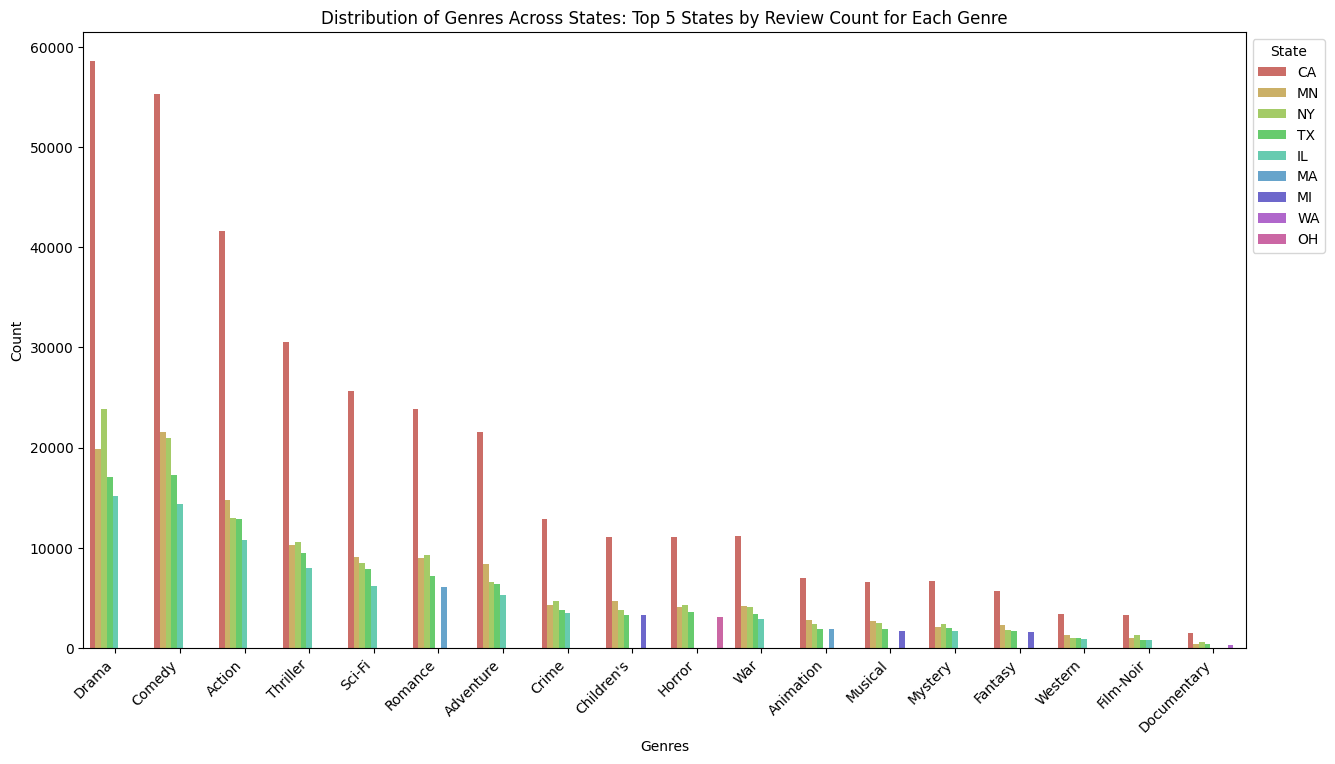

In [ ]:

# Count occurrences of each genre by state
genre_state_counts = final_exploded.groupby(['Genres', 'State']).size().reset_index(name='Count')
top_states_by_genre = genre_state_counts.groupby('Genres').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)


# Merge with the original genre_state_counts to get the count values
filtered_genre_state_counts = pd.merge(top_states_by_genre, genre_state_counts, on=['Genres', 'State', 'Count'], how='left')

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Genres', y='Count', hue='State', data=filtered_genre_state_counts,
            order=filtered_genre_state_counts.groupby('Genres')['Count'].sum().sort_values(ascending=False).index, palette = "hls")
plt.title('Distribution of Genres Across States: Top 5 States by Review Count for Each Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()


## From Feedback: Destribution of Ratings by Gender

<Figure size 1800x800 with 0 Axes>

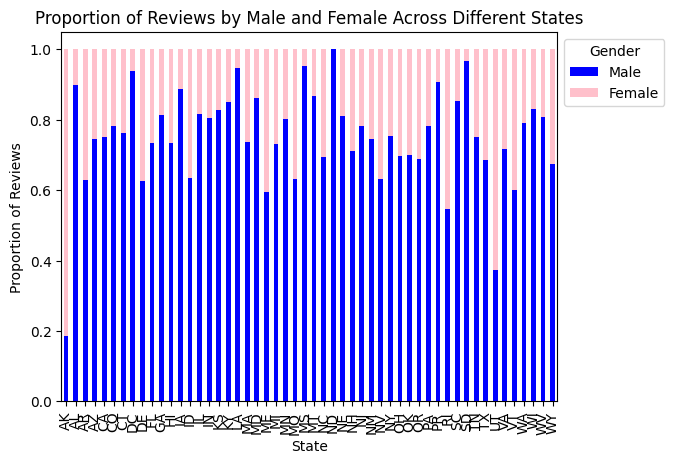

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame with the specified columns
# Replace 'Gender' and 'State' with your actual column names

# Calculate the proportion of reviews by male and female for each state
proportion_by_gender = final.groupby(['State', 'Gender']).size().unstack().div(final.groupby('State').size(), axis=0)

# Create a wider stacked barplot with legend labels
plt.figure(figsize=(18, 8))
ax = proportion_by_gender.plot(kind='bar', stacked=True, color=['blue', 'pink'])
plt.title('Proportion of Reviews by Male and Female Across Different States')
plt.xlabel('State')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1, 1))
plt.show()



<ipython-input-15-75bf78a3e77e>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genres', y='Rating', hue='Gender', data=final_exploded, ci=None, palette=['blue', 'pink'])


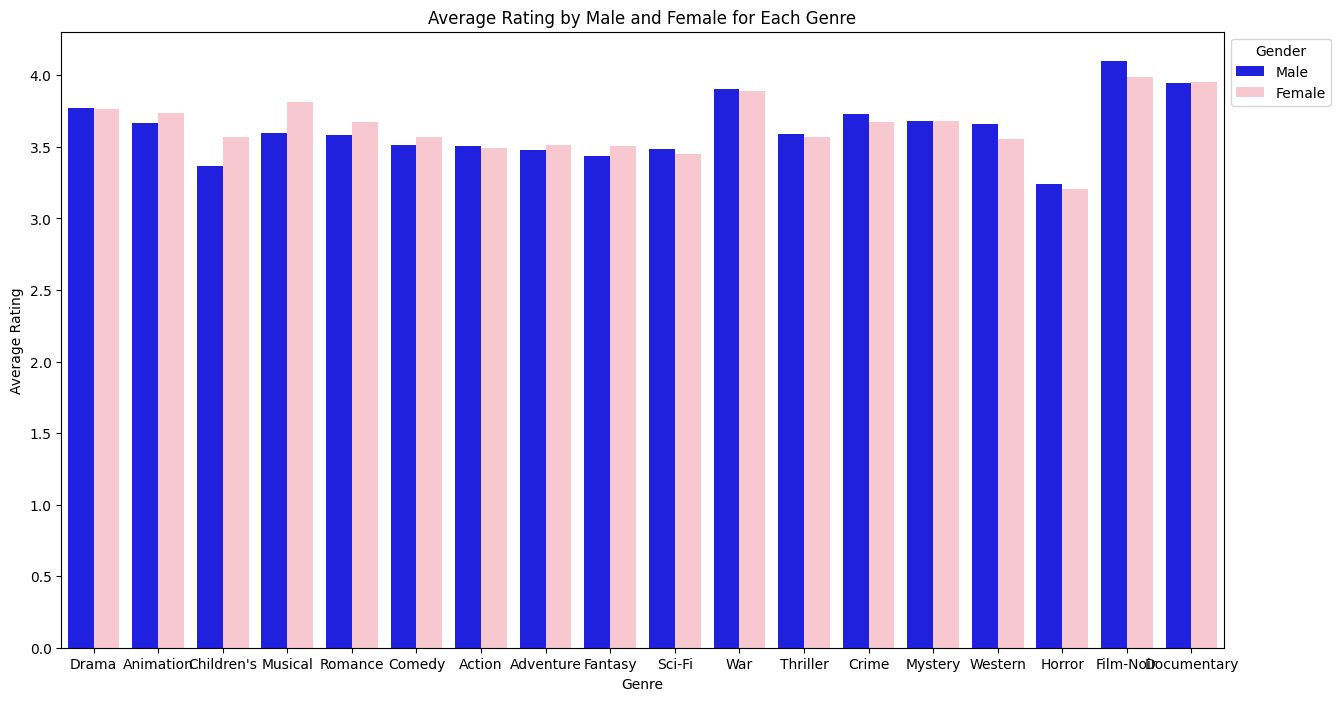

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_exploded' is your DataFrame with the specified columns
# Replace 'Gender', 'Genres', and 'Rating' with your actual column names

# Create a barplot for average rating by male and female for each genre
plt.figure(figsize=(15, 8))
sns.barplot(x='Genres', y='Rating', hue='Gender', data=final_exploded, ci=None, palette=['blue', 'pink'])
plt.title('Average Rating by Male and Female for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1, 1))
plt.show()



# Movies: By Movie Dataframe

In [ ]:


# Group by 'MovieID' and aggregate the desired columns
movies = final.groupby('MovieID').agg({
    'UserID': 'count',  # Count of user_ids
    'Title': 'first',  # Retained Title
    'ReleaseYear': 'first',  # Retained ReleaseYear
    'YearReviewed': 'first',  # Retained YearReviewed
    'MovieAge': 'first',  # Retained MovieAge
    'Rating': 'mean',  # Simple mean of ratings
    'Action': 'first',  # Retain Action column
    'Adventure': 'first',  # Retain Adventure column
    'Animation': 'first',  # Retain Animation column
    "Children's": 'first',  # Retain Children's column
    'Comedy': 'first',  # Retain Comedy column
    'Crime': 'first',  # Retain Crime column
    'Documentary': 'first',  # Retain Documentary column
    'Drama': 'first',  # Retain Drama column
    'Fantasy': 'first',  # Retain Fantasy column
    'Film-Noir': 'first',  # Retain Film-Noir column
    'Horror': 'first',  # Retain Horror column
    'Musical': 'first',  # Retain Musical column
    'Mystery': 'first',  # Retain Mystery column
    'Romance': 'first',  # Retain Romance column
    'Sci-Fi': 'first',  # Retain Sci-Fi column
    'Thriller': 'first',  # Retain Thriller column
    'War': 'first',  # Retain War column
    'Western': 'first',# Retain Western column
})

# Rename the 'UserID' column to 'ReviewCount'
movies.rename(columns={'UserID': 'ReviewCount'}, inplace=True)

# Display the final DataFrame
movies

,ReviewCount,Title,ReleaseYear,YearReviewed,MovieAge,Rating,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1771,Toy Story,1995,2001,6,4.137211,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,579,Jumanji,1995,2001,6,3.214162,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,399,Grumpier Old Men,1995,2000,5,3.022556,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,138,Waiting to Exhale,1995,2000,5,2.702899,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,253,Father of the Bride Part II,1995,2000,5,3.019763,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,754,Meet the Parents,2000,2000,0,3.629973,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3949,257,Requiem for a Dream,2000,2000,0,4.147860,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3950,44,Tigerland,2000,2001,1,3.727273,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bayesian Average Based on Review Count

In [ ]:
# Source: https://arpitbhayani.me/blogs/bayesian-average/
movies['weight'] = movies['ReviewCount']/(final.groupby("MovieID")['Rating'].count().mean() + movies['ReviewCount'])
movies['b_rating'] = movies['weight'] * final.groupby('MovieID').mean()['Rating'] + (1-movies['weight']) * final['Rating'].mean()
movies.drop('weight', axis = 1, inplace = True)



<ipython-input-17-ad729850ac97>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  movies['b_rating'] = movies['weight'] * final.groupby('MovieID').mean()['Rating'] + (1-movies['weight']) * final['Rating'].mean()


In [ ]:
movies.sort_values(by='b_rating', ascending=False)

,ReviewCount,Title,ReleaseYear,YearReviewed,MovieAge,Rating,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,b_rating
MovieID,,,,,,,,,,,,,,,,,,,,,
318,1926,"Shawshank Redemption, The",1994,2000,6,4.553998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.451104
858,1933,"Godfather, The",1972,2000,28,4.528195,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.428384
527,2005,Schindler's List,1993,2001,8,4.516708,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.421297
50,1538,"Usual Suspects, The",1995,2000,5,4.520156,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.399102
1198,2202,Raiders of the Lost Ark,1981,2000,19,4.480018,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4.395812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,279,Superman IV: The Quest for Peace,1987,2000,13,1.853047,1,1,0,0,...,0,0,0,0,0,1,0,0,0,2.639771
546,286,Super Mario Bros.,1993,2000,7,1.846154,1,1,0,1,...,0,0,0,0,0,1,0,0,0,2.625295
1556,293,Speed 2: Cruise Control,1997,2000,3,1.860068,1,0,0,0,...,0,0,0,0,1,0,1,0,0,2.622665


## Correlation Matrix (By Movie)

<ipython-input-19-523e7d848849>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(movies.corr(), dtype=np.bool))
<ipython-input-19-523e7d848849>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(movies.corr(), dtype=np.bool))
<ipython-input-19-523e7d848849>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_

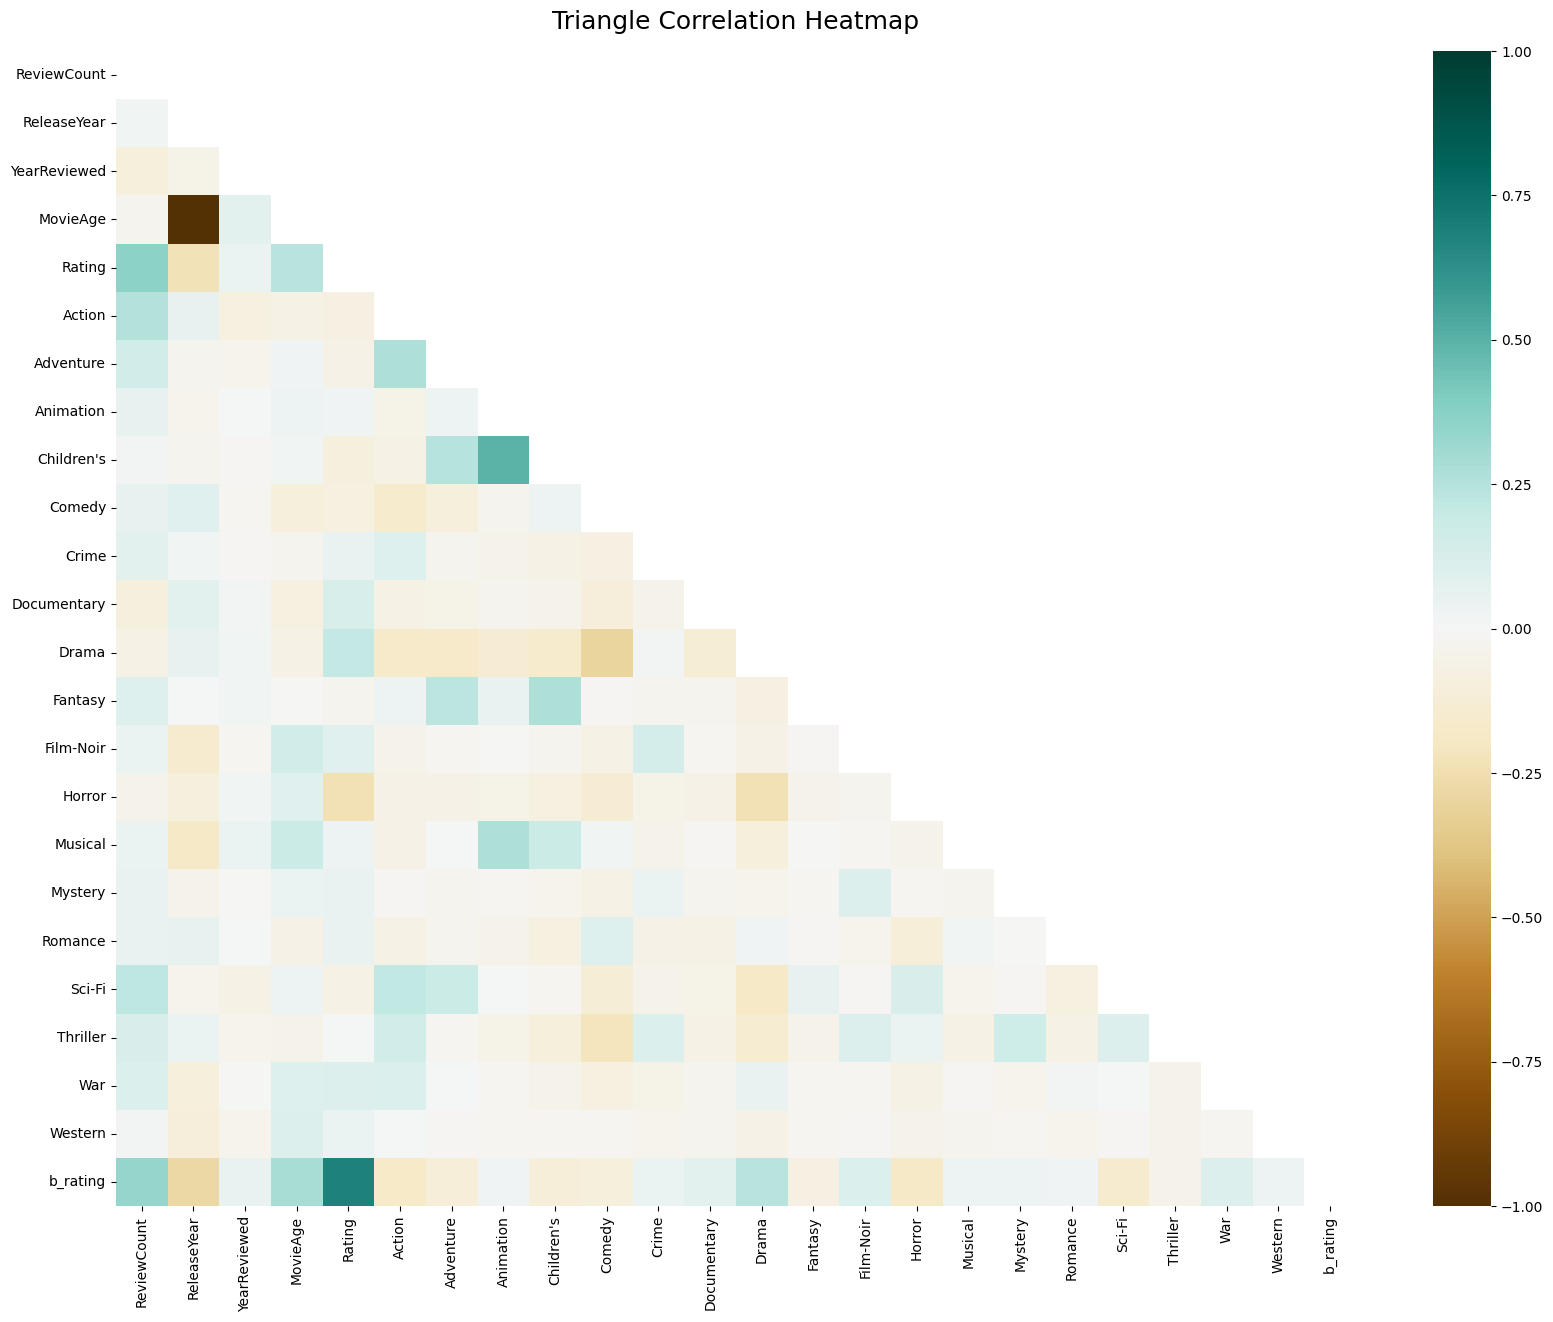

In [ ]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(movies.corr(), dtype=np.bool))
heatmap = sns.heatmap(movies.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG');
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Features Correlating with Rating

<ipython-input-20-11cd06295ab2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(movies.corr()[['b_rating']].sort_values(by='b_rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');


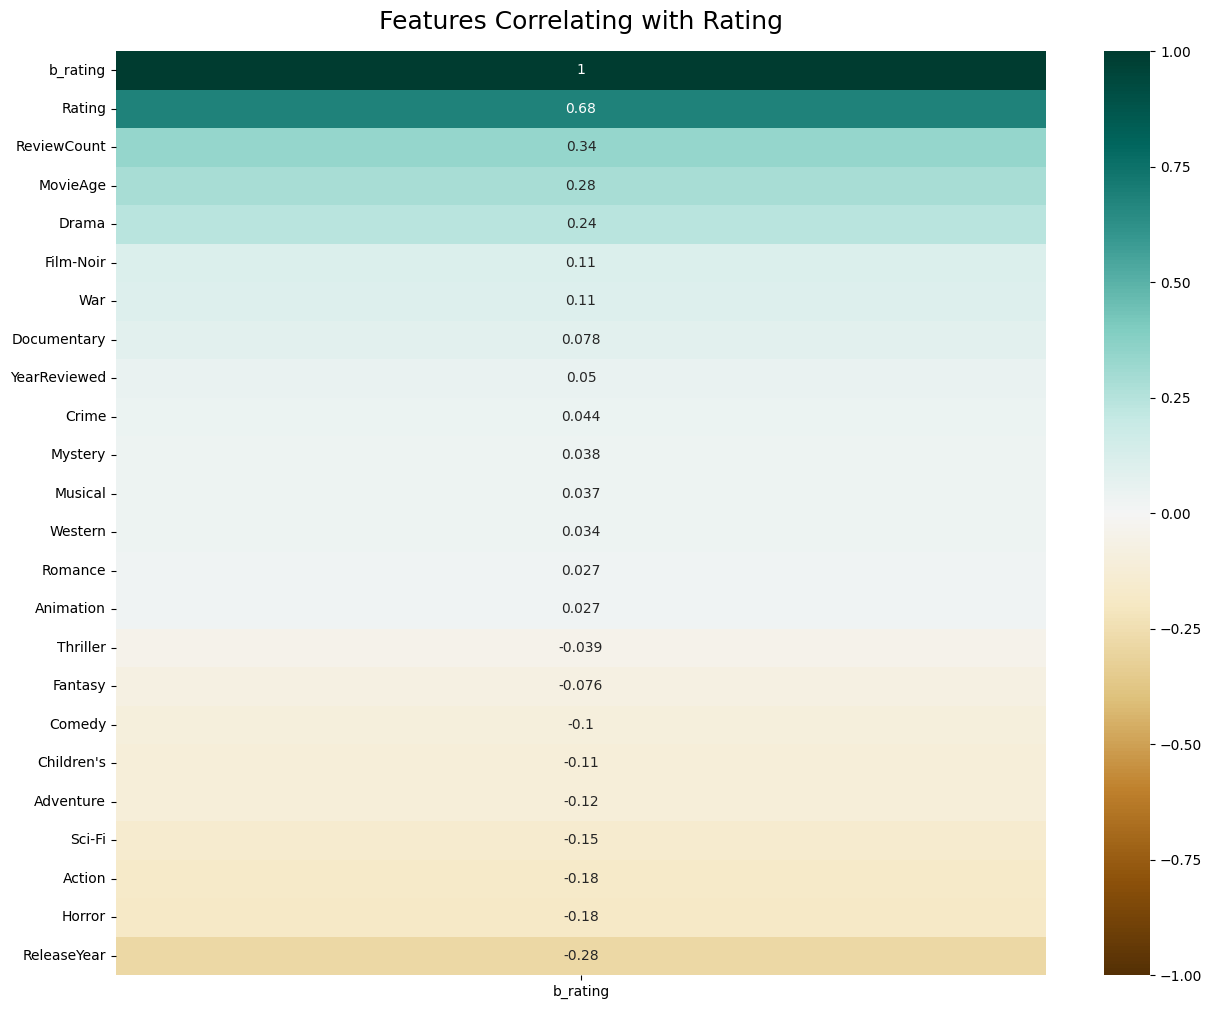

In [ ]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(movies.corr()[['b_rating']].sort_values(by='b_rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Features Correlating with Rating', fontdict={'fontsize':18}, pad=16);

## US Map Visualisation

In [ ]:
genre_state = final_exploded.groupby(['Genres', 'State']).agg({'Rating': 'mean', 'UserID': 'count'}).reset_index()

# Rename the columns for clarity
genre_state = genre_state.rename(columns={'Rating': 'AverageRating', 'UserID': 'ReviewCount'})

# Optionally, you can round the average rating to a specific decimal place
genre_state['AverageRating'] = genre_state['AverageRating'].round(2)
genre_state

In [ ]:
genre_state

,Genres,State,AverageRating,ReviewCount
0,Action,AK,4.01,120
1,Action,AL,3.67,1110
2,Action,AR,3.44,1002
3,Action,AZ,3.32,3784
4,Action,CA,3.46,41580
...,...,...,...,...
929,Western,VT,3.77,39
930,Western,WA,3.78,648
931,Western,WI,3.43,395
932,Western,WV,3.91,87


# Dataframes Overview

In [ ]:
# The original Dataframe by review with all columns preserved.
# Genres both in the column "Genres" (unexploded) and as dummies.
# Only removed rows where occupation was not specified.
final

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,YearReviewed,MovieAge,18-24,25-34,35-44,45-49,50-55,56+,Under 18,State
0,1,1193,5,978300760,1,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest,[Drama],...,2000,25,0,0,0,0,0,0,1,MI
1,2,1193,5,978298413,0,56+,self-employed,70072,One Flew Over the Cuckoo's Nest,[Drama],...,2000,25,0,0,0,0,0,1,0,LA
2,12,1193,4,978220179,0,25-34,programmer,32793,One Flew Over the Cuckoo's Nest,[Drama],...,2000,25,0,1,0,0,0,0,0,FL
3,15,1193,4,978199279,0,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest,[Drama],...,2000,25,0,1,0,0,0,0,0,VA
4,17,1193,5,978158471,0,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest,[Drama],...,2000,25,0,0,0,0,1,0,0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,0,18-24,technician/engineer,47901,Modulations,[Documentary],...,2000,2,1,0,0,0,0,0,0,IN
1000205,5675,2703,3,976029116,0,35-44,sales/marketing,30030,Broken Vessels,[Drama],...,2000,2,0,0,1,0,0,0,0,GA
1000206,5780,2845,1,958153068,0,18-24,technician/engineer,92886,White Boys,[Drama],...,2000,1,1,0,0,0,0,0,0,CA
1000207,5851,3607,5,957756608,1,18-24,writer,55410,One Little Indian,"[Comedy, Drama, Western]",...,2000,27,1,0,0,0,0,0,0,MN


In [ ]:
# The same as above but with genres exploded (hence more rows)
final_exploded

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,YearReviewed,MovieAge,18-24,25-34,35-44,45-49,50-55,56+,Under 18,State
0,1,1193,5,978300760,1,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,0,0,0,0,0,1,MI
1,2,1193,5,978298413,0,56+,self-employed,70072,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,0,0,0,0,1,0,LA
2,12,1193,4,978220179,0,25-34,programmer,32793,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,1,0,0,0,0,0,FL
3,15,1193,4,978199279,0,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,1,0,0,0,0,0,VA
4,17,1193,5,978158471,0,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest,Drama,...,2000,25,0,0,0,0,1,0,0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,958153068,0,18-24,technician/engineer,92886,White Boys,Drama,...,2000,1,1,0,0,0,0,0,0,CA
1000207,5851,3607,5,957756608,1,18-24,writer,55410,One Little Indian,Comedy,...,2000,27,1,0,0,0,0,0,0,MN
1000207,5851,3607,5,957756608,1,18-24,writer,55410,One Little Indian,Drama,...,2000,27,1,0,0,0,0,0,0,MN
1000207,5851,3607,5,957756608,1,18-24,writer,55410,One Little Indian,Western,...,2000,27,1,0,0,0,0,0,0,MN


In [ ]:
# Dataframe by Movie Name with dummies for genres.
# Note: Bayesian Mean based on number of reviews is the last column "b_rating"
movies

,ReviewCount,Title,ReleaseYear,YearReviewed,MovieAge,Rating,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,b_rating
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1771,Toy Story,1995,2001,6,4.137211,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4.074364
2,579,Jumanji,1995,2001,6,3.214162,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.321686
3,399,Grumpier Old Men,1995,2000,5,3.022556,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.230996
4,138,Waiting to Exhale,1995,2000,5,2.702899,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.258914
5,253,Father of the Bride Part II,1995,2000,5,3.019763,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.292465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,754,Meet the Parents,2000,2000,0,3.629973,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.621004
3949,257,Requiem for a Dream,2000,2000,0,4.147860,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.884832
3950,44,Tigerland,2000,2001,1,3.727273,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.613403
